<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Шаг-1.-Загрузка-и-обзор-данных." data-toc-modified-id="Шаг-1.-Загрузка-и-обзор-данных.-1">Шаг 1. Загрузка и обзор данных.</a></span></li><li><span><a href="#Шаг-2.-Анализ-данных." data-toc-modified-id="Шаг-2.-Анализ-данных.-2">Шаг 2. Анализ данных.</a></span><ul class="toc-item"><li><span><a href="#Шаг-2.1.-Анализ-количества-заказов-такси." data-toc-modified-id="Шаг-2.1.-Анализ-количества-заказов-такси.-2.1">Шаг 2.1. Анализ количества заказов такси.</a></span></li><li><span><a href="#Шаг-2.2.-Анализ-сезонности-и-тренда." data-toc-modified-id="Шаг-2.2.-Анализ-сезонности-и-тренда.-2.2">Шаг 2.2. Анализ сезонности и тренда.</a></span></li></ul></li><li><span><a href="#Шаг-3.-Обучение-и-тестирование-моделей." data-toc-modified-id="Шаг-3.-Обучение-и-тестирование-моделей.-3">Шаг 3. Обучение и тестирование моделей.</a></span><ul class="toc-item"><li><span><a href="#Шаг-3.1.-Проверка-простых-алгоритмов." data-toc-modified-id="Шаг-3.1.-Проверка-простых-алгоритмов.-3.1">Шаг 3.1. Проверка простых алгоритмов.</a></span><ul class="toc-item"><li><span><a href="#Прогноз-предыдущего-значения-ряда." data-toc-modified-id="Прогноз-предыдущего-значения-ряда.-3.1.1">Прогноз предыдущего значения ряда.</a></span></li><li><span><a href="#Прогноз-по-медианному-значению-ряда." data-toc-modified-id="Прогноз-по-медианному-значению-ряда.-3.1.2">Прогноз по медианному значению ряда.</a></span></li><li><span><a href="#Прогноз-по-среднему-значению-ряда." data-toc-modified-id="Прогноз-по-среднему-значению-ряда.-3.1.3">Прогноз по среднему значению ряда.</a></span></li></ul></li><li><span><a href="#Шаг-3.2.-Подготовка-признаков-и-настроек-моделей." data-toc-modified-id="Шаг-3.2.-Подготовка-признаков-и-настроек-моделей.-3.2">Шаг 3.2. Подготовка признаков и настроек моделей.</a></span></li><li><span><a href="#Шаг-3.3.-Обучение-и-тестирование-моделей." data-toc-modified-id="Шаг-3.3.-Обучение-и-тестирование-моделей.-3.3">Шаг 3.3. Обучение и тестирование моделей.</a></span></li><li><span><a href="#Шаг-3.4.-Сравнение-предсказания-лучшей-модели-с-целевым-признаком." data-toc-modified-id="Шаг-3.4.-Сравнение-предсказания-лучшей-модели-с-целевым-признаком.-3.4">Шаг 3.4. Сравнение предсказания лучшей модели с целевым признаком.</a></span></li></ul></li><li><span><a href="#Шаг-4.-Итоги-исследования." data-toc-modified-id="Шаг-4.-Итоги-исследования.-4">Шаг 4. Итоги исследования.</a></span><ul class="toc-item"><li><span><a href="#Шаг-4.1.-Описание-хода-исследования." data-toc-modified-id="Шаг-4.1.-Описание-хода-исследования.-4.1">Шаг 4.1. Описание хода исследования.</a></span></li><li><span><a href="#Шаг-4.2.-Общий-вывод." data-toc-modified-id="Шаг-4.2.-Общий-вывод.-4.2">Шаг 4.2. Общий вывод.</a></span></li></ul></li></ul></div>

#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Нужно построить модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Нам нужно:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

## Шаг 1. Загрузка и обзор данных.

In [1]:
# импорт библиотеки для предупреждений
import warnings
warnings.filterwarnings('ignore')

In [2]:
# импорт основных библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# импорт библиотек моделей 
from sklearn.dummy import DummyRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
# импорт библиотек с метриками 
from sklearn.metrics import mean_squared_error   
# импорт методов разделения выборок, стандартизации и pipline 
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
#импорт GridSearchCV 
from sklearn.model_selection import GridSearchCV
# импорт метода анализа временных рядов
from statsmodels.tsa.seasonal import seasonal_decompose
# импорт функции time 
from time import time


Bad key text.latex.preview in file C:\Users\regki\anaconda3\envs\praktikum_env_win_new\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file C:\Users\regki\anaconda3\envs\praktikum_env_win_new\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file C:\Users\regki\anaconda3\envs\praktikum_env_win_new\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 418 ('savefig.jpeg_qua

In [3]:
# чтение файла с датасетом, испульзуя конструкцию try-except, преобразование данных с датами в индекс и перевод в формат даты 
try:
    df = pd.read_csv('/Users/regki/Downloads/taxi.csv', index_col = [0], parse_dates = [0])
except:
    df = pd.read_csv('/datasets/taxi.autos', index_col = [0], parse_dates = [0])
df

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32
...,...
2018-08-31 23:10:00,32
2018-08-31 23:20:00,24
2018-08-31 23:30:00,27


In [4]:
# обзор данных
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


- В датасете после назначение индексами временного ряда всего 26496 строк, 1 столбец в целочисленном формате, данные которго являются целевым признаком.
- В данных пропусков нет.
- Интервал во временном ряде 10 минут.
- Для удобства работы с данными и обучения моделей произведем ресемплирование данных по 1 часу.
- Проверим индексы на упорядоченность.

In [5]:
# проверка индексов на упорядоченность
df.index.is_monotonic

True

In [6]:
# ресемплирование данных по 1 часу
df = df.resample('1H').sum()

In [7]:
# обзор данных после ресемплирования
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4416 entries, 2018-03-01 00:00:00 to 2018-08-31 23:00:00
Freq: H
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  4416 non-null   int64
dtypes: int64(1)
memory usage: 69.0 KB


- Количество строк в данных после ресемплирования уменьшилось до 4416.

## Шаг 2. Анализ данных.

### Шаг 2.1. Анализ количества заказов такси.

In [8]:
# описание данных
df.describe()

,num_orders
count,4416.000000
mean,84.422781
std,45.023853
min,0.000000
25%,54.000000
50%,78.000000
75%,107.000000
max,462.000000


- В среднем за весь период такси заказывают около 84 раз за час.
- Распределение имеет смещение в сторону больших значений, так как среднее количество больше медианы, но незначительно.
- Максимальное значение в несколько раз больше среднего и медианы.
- Построим гистограмму распределения, где укажем медиану, квантили и полуторный интерквартильный размах.

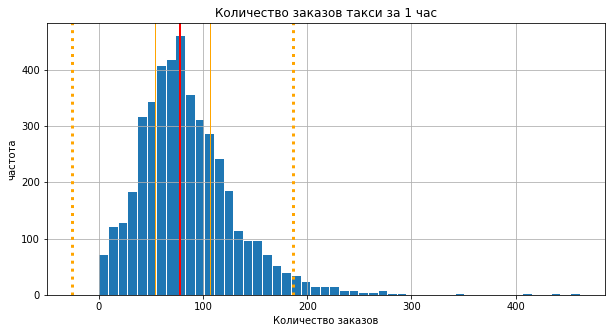

In [9]:
# создание гистограммы распределния по количеству заказов такси. Красной вертикальной линией показана медиана значений,
# тонкими оранжевыми вертикальными линияими показаны 1 и 3 квартиль данных. Пунктирными вертикальными линиями показаны
# полуторный межквартильный размах, который записан в переменную iqr. 
iqr = (df['num_orders'].quantile(0.75) - df['num_orders'].quantile(0.25))
df.hist('num_orders' , bins=50, rwidth=0.9, figsize=(10 , 5))
plt.title('Количество заказов такси за 1 час')
plt.xlabel('Количество заказов')
plt.ylabel('частота')
plt.axvline( x=df['num_orders'].median() , ymin=0 , c='red' , lw=2 )
plt.axvline( x=df['num_orders'].quantile(0.25) , ymin=0 , c='orange' , lw=1 )
plt.axvline( x=df['num_orders'].quantile(0.75) , ymin=0 , c='orange' , lw=1 )
plt.axvline(x=(df['num_orders'].quantile(0.25) - 1.5*iqr) , c='orange' , lw=3 , ls=':')
plt.axvline(x=(df['num_orders'].quantile(0.75) + 1.5*iqr) , c='orange' , lw=3 , ls=':')

- Распределение все же имеет вид достаточно близкий к нормальному.
- Гистограмма имеет существеннй хвост, смещенный вправо от нуля.
- Имеются данные, где количество заказов более 300 и которые можно назвать выбросами. Но эти данные возможно не ошибочны и могут быть связаны с всплесками заказов в праздничные дни.

### Шаг 2.2. Анализ сезонности и тренда.

<AxesSubplot:xlabel='datetime'>

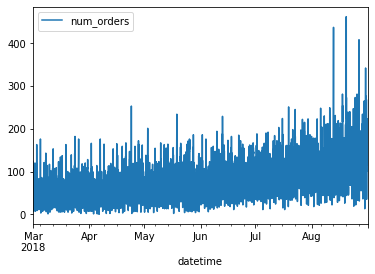

In [10]:
# построение общего графика количества заказов за весь период
df.plot()

- В целом, судя по графику сервис увеличивал число заказов с течением всремени за весь период. 
- Разложим данные на сезонную составляющую, тренд и шумы.

In [11]:
# разложение данных на сезонную составляющую, тренд и шумы
decomposed = seasonal_decompose(df)

Text(0.5, 1.0, 'Шумы')

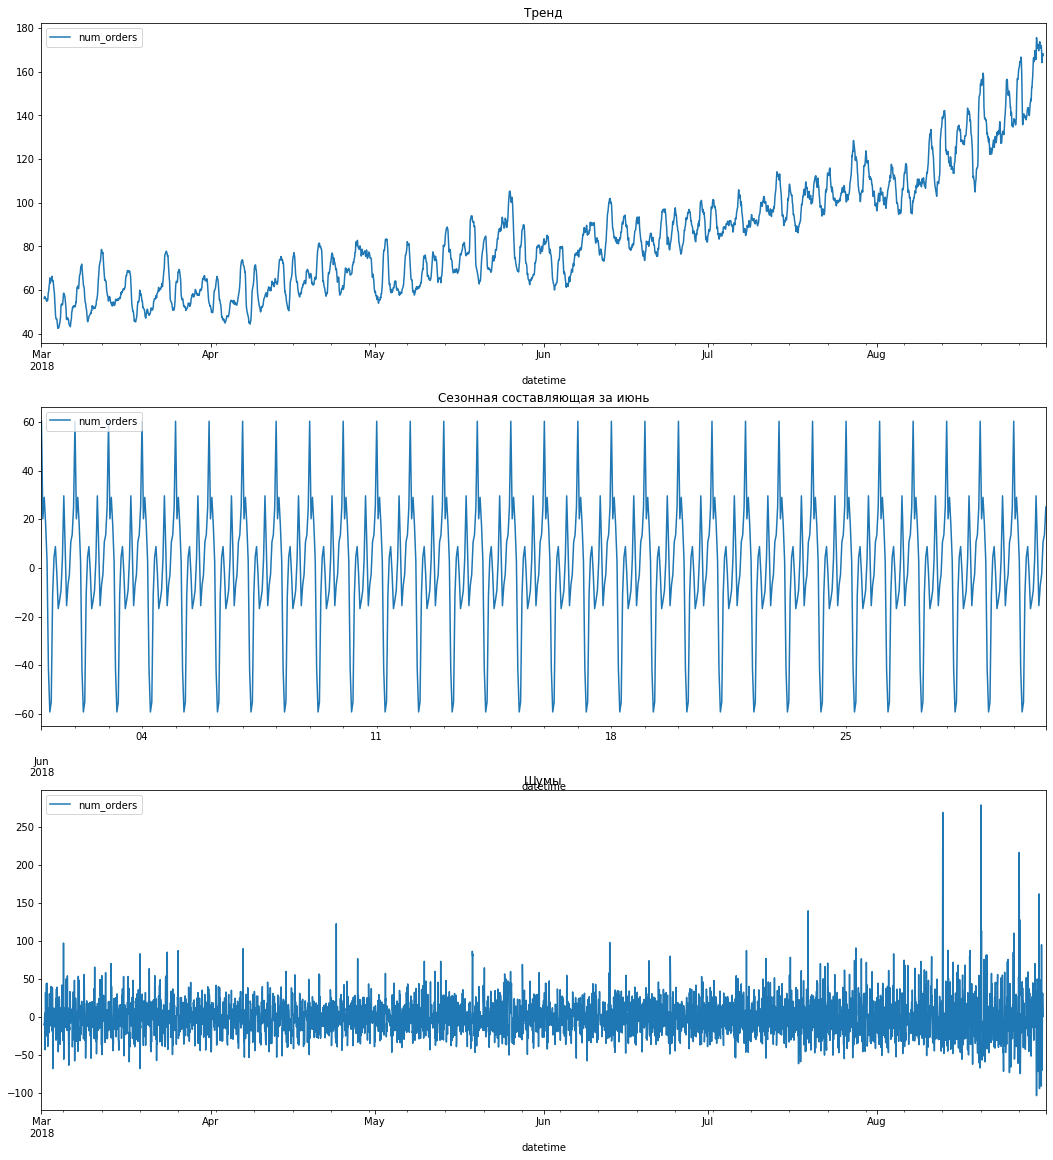

In [12]:
# Построение графиков по сезонной составляющей, тренду и шумам
fig, ax = plt.subplots(3, 1, figsize=(18, 20))
ax[0] = decomposed.trend.plot(ax=ax[0])
ax[0].set_title('Тренд')
ax[1] = decomposed.seasonal['2018-06':'2018-06'].plot(ax=ax[1])
ax[1].set_title('Сезонная составляющая за июнь')
ax[2] = decomposed.resid.plot(ax=ax[2])
ax[2].set_title('Шумы')


- Как и из общей части, из графика тренда видно, что количество заказов такси с марта по август растет, но имеются резкие всплески и падения заказов в течении одного месяца. Поэтому для обучения будем применять скользящее среднее с окном от нескольких часов до нескольких дней.
- В сезонной части имеются резкие падения и рост заказов в течение суток. Далее рассмотрим более подробно график сезонной части за один день.
- На графике случайного ряда видны всплески, скорее всего обусловленные какими-либо конкретными датами или праздниками.

<AxesSubplot:xlabel='datetime'>

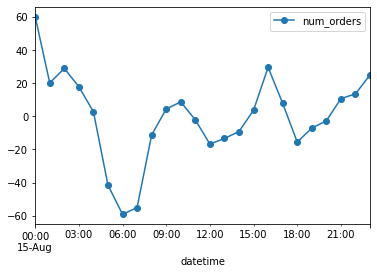

In [13]:
# обзор сезонной составляющей в течении суток
decomposed.seasonal['2018-08-15':'2018-08-15'].plot(style='o-')

- Наибольшее количество заказов размещается в ночное и вечернее время.
- Средние показатели достигаются в утренние часы после 9-00 и до 18-00.
- Колебания в наименьшую сторону возникают с 3-00 ночи до 6-00 утра.

Посмотрим на сколько количество заказов такси зависит от дня недели. Для этого сохраним датафрейм в новой переменной, произведем ресемплирование по 1 дню, сделаем декомпозицию, затем построим график за 1 неделю.

In [14]:
# сохранение данных в новой переменной
df_week = df.copy(deep=True)

In [15]:
# ресемплирование по 1 дню
df_week = df_week.resample('1d').sum()

In [16]:
# декомпозиция данных
decompose_week = seasonal_decompose(df_week)

In [17]:
# вывод на экран последних строк таблицы, включающими данные за понедельники
df_week[df_week.index.dayofweek == 0].tail()

,num_orders
datetime,
2018-07-30,2774
2018-08-06,2794
2018-08-13,3356
2018-08-20,3826
2018-08-27,3936


<AxesSubplot:xlabel='datetime'>

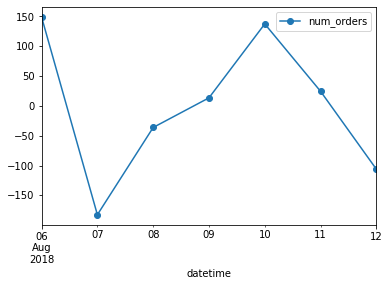

In [18]:
# построение графика сезонной составляющей за 1 неделю
decompose_week.seasonal['2018-08-06':'2018-08-12'].plot(style='o-')

- Максимумы количества заказов такси наблюдаются в понедельник и пятницу. Накануне выходных такси пользуется повышенным спросом, а вначале рабочей недели люди массово едут на работу.
- Во вторник обычно происходит резкий обвал заказов.
- Со вторника по пятницу постепенный рост.
- С субботы на воскресение планомерное снижение.

## Шаг 3. Обучение и тестирование моделей.

### Шаг 3.1. Проверка простых алгоритмов.

In [19]:
# вывод на экран максимального и минимального индекса
print(df.index.min(), df.index.max())

2018-03-01 00:00:00 2018-08-31 23:00:00


In [20]:
# деление данных на обучающую и тестовую выборки
train, test = train_test_split(df, shuffle=False, test_size=0.1)
train = train.dropna()

#### Прогноз предыдущего значения ряда.

In [21]:
# вывод на экран RMSE по прогнозу предыдущего значения ряда
pred_shift = test['num_orders'].shift(fill_value=train.iloc[-1,0])
rmse_shift =  (mean_squared_error(test['num_orders'], pred_shift))**0.5
print("RMSE по прогнозу предыдущего значения ряда:", rmse_shift)

RMSE по прогнозу предыдущего значения ряда: 58.856486242815066


#### Прогноз по медианному значению ряда.

In [22]:
# вывод на экран RMSE по прогнозу по медианному значению ряда
pred_median = np.ones(test.shape) * train['num_orders'].median()
rmse_median = (mean_squared_error(test['num_orders'], pred_median))**0.5
print("RMSE по медианному значению ряда:", rmse_median)

RMSE по медианному значению ряда: 87.15277582981295


#### Прогноз по среднему значению ряда.

In [23]:
# вывод на экран RMSE по прогнозу по среднему значению ряда
pred_mean = np.ones(test.shape) * train['num_orders'].mean()
rmse_mean = (mean_squared_error(test['num_orders'], pred_mean))**0.5
print("RMSE по среднему значению ряда:", rmse_mean)

RMSE по среднему значению ряда: 84.74414402014742


- Наилучший RMSE из простых алгоритмов показала модель прогнозирования предыдущего значения ряда.
- Все модели, кроме Dummy должны показать RMSE ниже показателей простых алгоритмов.

### Шаг 3.2. Подготовка признаков и настроек моделей.

Создадим функцию.
- Принимает аргументами: датафрейм, максимальную разность временного ряда, размер интервала усреднения модели.
- Внутри функции создаются новые признаки для модели:
   - Месяц, день, день недели, час заказа такси.
   - Признаки с разностью временного ряда в 1 час и более от целевого признака.
   - Скользящее среднее.
   - Скользящее стандартное отклонение.
- Функция возвращает датафрейм с добавленными признаками.

In [24]:
# создание функции для создания новых признаков
def make_features(data, max_lag, rolling_mean_size):
    data['dayofweek'] = data.index.dayofweek
    data['hour'] = data.index.hour
    data['day'] = data.index.hour
                                           
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)

    data['rolling_mean'] = data['num_orders'].shift().rolling(rolling_mean_size).mean()
    data['std'] = data['num_orders'].shift().rolling(rolling_mean_size).std()
    return data

In [25]:
# построение тестовой таблицы с помощью функции и вывод верхней ее части
df_test = make_features(df, 5, 5)
df_test.head(10)

,num_orders,dayofweek,hour,day,lag_1,lag_2,lag_3,lag_4,lag_5,rolling_mean,std
datetime,,,,,,,,,,,
2018-03-01 00:00:00,124,3,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 01:00:00,85,3,1,1,124.0,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 02:00:00,71,3,2,2,85.0,124.0,NaN,NaN,NaN,NaN,NaN
2018-03-01 03:00:00,66,3,3,3,71.0,85.0,124.0,NaN,NaN,NaN,NaN
2018-03-01 04:00:00,43,3,4,4,66.0,71.0,85.0,124.0,NaN,NaN,NaN
2018-03-01 05:00:00,6,3,5,5,43.0,66.0,71.0,85.0,124.0,77.8,29.928248
2018-03-01 06:00:00,12,3,6,6,6.0,43.0,66.0,71.0,85.0,54.2,30.898220
2018-03-01 07:00:00,15,3,7,7,12.0,6.0,43.0,66.0,71.0,39.6,29.938270
2018-03-01 08:00:00,34,3,8,8,15.0,12.0,6.0,43.0,66.0,28.4,25.383065


Для настройки и тестирования выберем 4 модели:
- Простой Dummy-алгоритм "DummyRegressor".
- Линейная модель "LinearRegression".
- Модель дерева решений "DecisionTreeRegressor".
- Модель градиентного бустинга "LGBMRegressor".

In [26]:
# создание "pipeline" для четырех моделей МО
pipe_dumr = Pipeline([('scaler', StandardScaler()),
                    ('reg', DummyRegressor())])

pipe_lr = Pipeline([('scaler', StandardScaler()),
                    ('reg', LinearRegression())])

pipe_dr = Pipeline([('scaler', StandardScaler()),
                    ('reg', DecisionTreeRegressor(random_state=0))])

pipe_lgbm = Pipeline([('scaler', StandardScaler()),
                    ('reg', LGBMRegressor(random_state=0))])

In [27]:
# создание списков-словарей с параметрами моделей МО

param_dumr = {'reg__strategy': ['mean']}

param_lr = {'reg__fit_intercept': [True, False],
             'reg__normalize': [True, False],
             'reg__copy_X': [True, False]}

param_dr = {'reg__max_depth': [4, 8, 16],
             'reg__splitter': ['best', 'random'],
             'reg__max_features': ['sqrt']}

param_lgbm = {'reg__max_depth': [6, 14],
             'reg__learning_rate' : [0.01, 0.05, 0.3],
             'reg__n_estimators' : [100, 200]}

In [28]:
# создание переменных с записью в них GridSearchCV (далее GSCV) для поиска оптимальных параметров по каждой модели МО

DUMR = GridSearchCV(estimator=pipe_dumr,
            param_grid=param_dumr,
                 cv=2) 

LR = GridSearchCV(estimator=pipe_lr,
            param_grid=param_lr,
                 cv=2) 

DR = GridSearchCV(estimator=pipe_dr,
            param_grid=param_dr,
                 cv=2)

LGBM = GridSearchCV(estimator=pipe_lgbm,
            param_grid=param_lgbm,
                   cv=2)

In [29]:
# создание списка с GridSearchCV(GSCV) по каждой модели МО
grids = [DUMR, LR, DR, LGBM]

# создание словаря с наименованием каждой модели МО
grid_dict = {0: 'DummyRegressor',
             1: 'LinearRegression', 
             2: 'DecisionTreeRegressor',
             3: 'LGBMRegressor'}

### Шаг 3.3. Обучение и тестирование моделей.

Создадим функцию.
- Она принимает аргументами:
   - списка с GridSearchCV(GSCV) по каждой модели МО.
   - Значения нижней и верхней границы диапазона, а также шаг для перебора значений максимальной разности временного ряда в функции создания новых признаков.
   - Значения нижней и верхней границы диапазона, а также шаг для перебора значений интервала усреднения в функции создания новых признаков.
- Внутри функции:
   - В первом цикле перебирается каждая модель.
   - Во втором цикле происходит перебор нескольких значений максимальной разности временного ряда.
   - В третьем цикле:
      - Итерируются нескольких значений интервала усреднения.
      - Вызов функции для создания новых признаков.
      - Деление нового датафрейма на обучающую и тестовую выборки с 10% от общей, а также выделение из них признаков и целевого признака.
      - Обучение, предсказание модели, вычисление времени этих процессов.
      - По условию вычисляется лучший RMSE модели и сохраняются параметры при этом показателе.
- В словарь добавляются лучший RMSE и параметры для модели.
- Вывод на экран лучшего RMSE модели, максимальной разности временного ряда и интервала усреднения при этом показателе.
- Функция возвращает словарь с лучшими показателями каждой модели.

In [30]:
# создание функции для настройки гиперпараметров, обучения и тестирования модели
def test_model(list_grids, min_shift, max_shift, step_shift, min_wind, max_wind, step_wind):    
    best_model_params = {'Модель' : [],
                        'Лучшие параметры модели' : [],
                        'Лучшее RMSE модели' : [],
                        'Время обучения модели' : [],
                        'Время предсказания модели' : [],
                        'Лучшая максимальная разность временного ряда для модели' : [],
                        'Лучший интервал усреднения для модели' : []}
    for idx, gs in enumerate(list_grids):
        best_score = 1000
        best_params = None
        best_lag = 0
        best_win_size = 0
        best_time_train = 0
        best_time_predict = 0
        print('Модель:{}'.format(grid_dict[idx]))
        print('\n')
        
        for shift in range(min_shift, max_shift, step_shift):
            
            for win_size in range(min_wind, max_wind, step_wind):
                
                df_1 = make_features(df, shift, win_size)
                
                train, test = train_test_split(df_1, shuffle=False, test_size=0.1)
                train = train.dropna()
                X_train = train.drop('num_orders', axis=1)
                y_train = train['num_orders']
                X_test = test.drop('num_orders', axis=1)
                y_test = test['num_orders']
                
                t0 = time()
                gs.fit(X_train, y_train)
                time_train = time()-t0
                t1 = time()
                predictions = gs.predict(X_test)
                time_predict = time() - t1
                RMSE = (mean_squared_error(y_test, predictions))**0.5
                  
                if RMSE < best_score:
                    best_score = RMSE
                    best_params = gs.best_params_
                    best_lag = shift
                    best_win_size = win_size
                    best_time_train = time_train
                    best_time_predict = time_predict
        best_model_params['Модель'].append(grid_dict[idx])
        best_model_params['Лучшие параметры модели'].append(best_params)
        best_model_params['Лучшее RMSE модели'].append(best_score)
        best_model_params['Время обучения модели'].append(best_time_train)
        best_model_params['Время предсказания модели'].append(best_time_predict)
        best_model_params['Лучшая максимальная разность временного ряда для модели'].append(best_lag)
        best_model_params['Лучший интервал усреднения для модели'].append(best_win_size)
        print('Лучшая максимальная разность временного ряда для модели {}: {}'.format(grid_dict[idx], best_lag))
        print()
        print('Лучший интервал усреднения для модели {}: {}'.format(grid_dict[idx], best_win_size))
        print()
        print('Лучшее RMSE для модели {}: {}'.format(grid_dict[idx], best_score)) 
        print('\n\n')
    return best_model_params

In [31]:
# вызов функции для настройки гиперпараметров, обучения и тестирования модели
best_model_params = test_model(grids, 10, 31, 10, 10, 151, 10)

Модель:DummyRegressor


Лучшая максимальная разность временного ряда для модели DummyRegressor: 10

Лучший интервал усреднения для модели DummyRegressor: 150

Лучшее RMSE для модели DummyRegressor: 84.05093445284929



Модель:LinearRegression


Лучшая максимальная разность временного ряда для модели LinearRegression: 10

Лучший интервал усреднения для модели LinearRegression: 120

Лучшее RMSE для модели LinearRegression: 44.70970279563145



Модель:DecisionTreeRegressor


Лучшая максимальная разность временного ряда для модели DecisionTreeRegressor: 10

Лучший интервал усреднения для модели DecisionTreeRegressor: 150

Лучшее RMSE для модели DecisionTreeRegressor: 50.830871247383726



Модель:LGBMRegressor


Лучшая максимальная разность временного ряда для модели LGBMRegressor: 10

Лучший интервал усреднения для модели LGBMRegressor: 110

Лучшее RMSE для модели LGBMRegressor: 39.93668384515573





In [32]:
# сохранение лучших параметров моделей в таблицу
pd.set_option('max_colwidth', 150)
df_best_params = pd.DataFrame(data=best_model_params)
df_best_params

,Модель,Лучшие параметры модели,Лучшее RMSE модели,Время обучения модели,Время предсказания модели,Лучшая максимальная разность временного ряда для модели,Лучший интервал усреднения для модели
0,DummyRegressor,{'reg__strategy': 'mean'},84.050934,0.015637,0.000000,10,150
1,LinearRegression,"{'reg__copy_X': True, 'reg__fit_intercept': True, 'reg__normalize': False}",44.709703,0.109640,0.000000,10,120
2,DecisionTreeRegressor,"{'reg__max_depth': 8, 'reg__max_features': 'sqrt', 'reg__splitter': 'best'}",50.830871,0.147926,0.001002,10,150
3,LGBMRegressor,"{'reg__learning_rate': 0.05, 'reg__max_depth': 14, 'reg__n_estimators': 200}",39.936684,4.425029,0.000499,10,110


- Все модели показали лучшие результаты в сравнении с Dummy-моделью и с моделью, основанной на прогнозе предыдущего значения ряда.
- Оптимальная максимальная разность временного ряда стремится к минимальным значениям на всех моделях и в данном тестировании равна 10. Возможно на большом числе признаков с разностью временного ряда может происходить переобучение модели.
- Оптимальным размером скользящего среднего окна в Dummy-модели и модели Дерева решений "DecisionTreeRegressor" является окно в 150 часов, а для Линейной модели "LinearRegression" 120 часов, а для модели Градиентного бустинга "LGBMRegressor" 110 часов.
- Линейная модель "LinearRegression" удовлетворяет условию поставленной задачи с результатом RMSE менее 48, а время обучения модели одно из лучших.
- Лучшее RMSE чуть менее 40 показала модель градиентного бустинга "LGBMRegressor", но время обучения существенно хуже, чем у Линейной регрессии.

### Шаг 3.4. Сравнение предсказания лучшей модели с целевым признаком.

Сравним на графике целевые значения и значения предсказаний модели с лучшим RMSE.

In [33]:
# деление на выборки, обучение и предсказание лучшей модели
df_plot = make_features(df, 10, 110)

train, test = train_test_split(df, shuffle=False, test_size=0.2)
train = train.dropna()

X_train = train.drop('num_orders', axis = 1)
y_train = train['num_orders']
X_test = test.drop('num_orders', axis = 1)
y_test = test['num_orders']

model = LGBM
LGBM.fit(X_train, y_train)
pred_plot = pd.Series(LGBM.predict(X_test), index = y_test.index, name='predictions')

In [34]:
# соединение в одну таблицу целевого признака и предсказания модели
df_predictions = pd.concat([y_test, pred_plot], axis=1)
df_predictions.head(10)

,num_orders,predictions
datetime,,
2018-07-26 04:00:00,131,123.062375
2018-07-26 05:00:00,83,76.135013
2018-07-26 06:00:00,21,64.604412
2018-07-26 07:00:00,39,55.804843
2018-07-26 08:00:00,80,85.643060
2018-07-26 09:00:00,138,113.640360
2018-07-26 10:00:00,142,115.379232
2018-07-26 11:00:00,86,108.955322
2018-07-26 12:00:00,102,108.311289


<AxesSubplot:title={'center':'Временной ряд по целевому признаку и предсказанию'}, xlabel='datetime'>

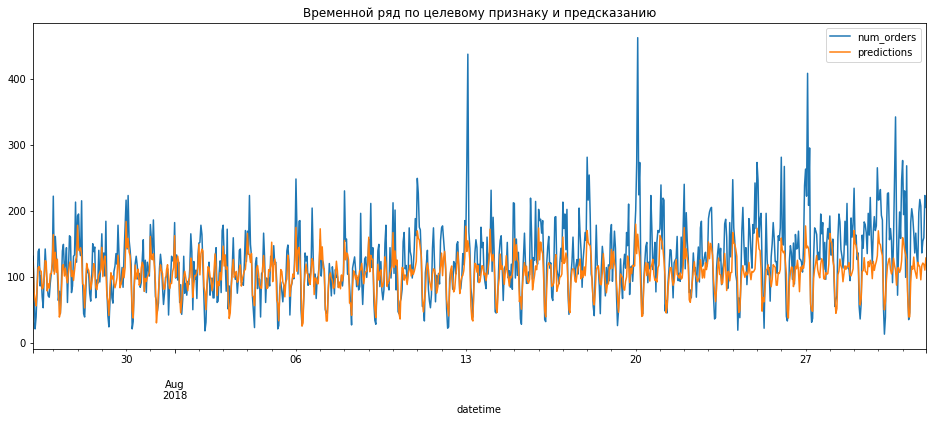

In [35]:
# вывод на экран графика с целевым признаком и предсказаниями модели
plt.figure(figsize=(16,6))
plt.title('Временной ряд по целевому признаку и предсказанию')
df_predictions['num_orders'].plot(legend=True)
df_predictions['predictions'].plot(legend=True)

- В среднем видно, что предсказания достаточно точно повторяют целевой признак, но всплески в некоторых местах все же не удается повторить.
- Особенно заметны расхождения в конце графика, где наблюдается тренд на рост количества заказов такси.

## Шаг 4. Итоги исследования.

### Шаг 4.1. Описание хода исследования.

Для реализации поставленной задачи мы:
   - Загрузили данные, даты сделали индексами в формате даты.
   - Изучили датасет.
   - Провели ресемплирование данных по одному часу.
   - Проанализировали количество заказов такси, построили гистограмму распределения с использованием квантилей.
   - Провели анализ сезонности и тренда.
   - Вычислили RMSE на простых алгоритмах.
   - Написали функцию для создания новых признаков.
   - Подготовили гиперпараметры для моделей.
   - Написали функцию для обучения и тестирования моделей.
   - Обучили и протестировали модели.
   - Лучшие данные моделей сохранили в талице.
   - Графически сравнили целевой признак и предсказания модели.   

По итогам исследования делаем общий вывод:

### Шаг 4.2. Общий вывод.

- В данных имеются экстремально большие значения, а также тренд на увеличение заказов такси в последние месяцы, что очень негативно влияет на точность предсказания моделей.
- Лучшее значение метрики RMSE показала модель Градиентного бустинга "LGBMRegressor". Но время обучения этой модели на данных оказалось самым медленным.
- Линейная модель "LinearRegression" также выдала RMSE удовлетворяющее условию задачи, а время ее обучения существенно лучше чем у "LGBMRegressor", но предсказания немного медленнее.